# Dotplot - example with python  
Import libraries for matrix manipulation **numpy** and creating plots **matplotlib.pyplot*


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define a variable thath contains all the letters for Amino Acids

In [2]:

aa=" alanine - ala - A (gif, interactive);arginine - arg - R (gif, interactive);asparagine - asn - N (gif, interactive);"
aa+="aspartic acid - asp - D (gif, interactive);cysteine - cys - C (gif, interactive);glutamine - gln - Q (gif, interactive);"
aa+="glutamic acid - glu - E (gif, interactive);glycine - gly - G (gif, interactive);histidine - his - H (gif, interactive);"
aa+="isoleucine - ile - I (gif, interactive);leucine - leu - L (gif, interactive);lysine - lys - K (gif, interactive);"
aa+="methionine - met - M (gif, interactive);phenylalanine - phe - F (gif, interactive);proline - pro - P (gif, interactive);"
aa+="serine - ser - S (gif, interactive);threonine - thr - T (gif, interactive);tryptophan - trp - W (gif, interactive);"
aa+="tyrosine - tyr - Y (gif, interactive);valine - val - V (gif, interactive)"

aas = [ _.split(' - ')[-1] for _ in [ _.split(" (")[0] for _ in aa.split(";")]]
aas.append("B")
aas.append("Z")
print(aas)
total_aas  = len(aas)

['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'B', 'Z']


Creating some random sequences of amino acids

In [3]:
#random_squence

seq1n = 10
seq2n = 30
seq1 = "".join(np.random.choice(aas,seq1n,replace=True))
seq2 = "".join(np.random.choice(aas,seq2n,replace=True))

print("Sequence 1:\n",seq1,"\n\nSeq2:\n",seq2)

Sequence 1:
 PQLRFYQGVF 

Seq2:
 LMWQELZIFRGTAVAVLFMANQMTALAVBY


These functions can transform a sequence of letters into a mxn matrix, where **m** is the number of amino acids in the sample sequence and **n** is the number of possible amino acids.  
If the letter A is found in the first position of the list of amino acids, then, a vector full of zeros will be returned expect the first position with a **1**.  
  
The Other two functions show the sequences transformed into this vector space and the dot product between these two

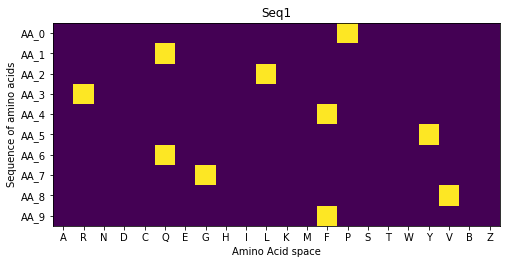

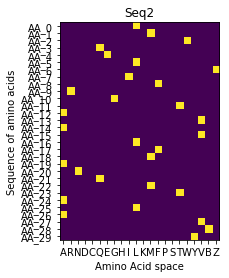

In [4]:
def seq_to_matrix(iseq,aas):
    seq_matrix = []
    total_aas  = len(aas)
    base_np = np.zeros((1,total_aas))
    for _ in range(len(iseq)):
        _i = aas.index(iseq[_])
        onp = base_np.copy()
        onp[0,_i]=1
        seq_matrix.append(onp.copy())
    seq_matrix = np.vstack(seq_matrix)
    return seq_matrix.copy()

def show_matrix_seq(iseq,aas,title=""):
    fig = plt.figure(figsize=(8,4))
    plt.imshow(iseq)
    plt.xticks(np.arange(total_aas),[_ for _ in aas])
    plt.yticks(np.arange(iseq.shape[0]),[ "AA_"+str(_) for _ in range(iseq.shape[0])])
    plt.xlabel("Amino Acid space")
    plt.ylabel("Sequence of amino acids")
    plt.title(title)
    plt.show()

def show_dot_product(iseq,seq1,seq2,title=""):
    fig = plt.figure(figsize=(8,4))
    plt.imshow(iseq)
    plt.xticks(np.arange(len(seq2)),[_ for _ in seq2])
    plt.yticks(np.arange(len(seq1)),[_ for _ in seq1])
    plt.xlabel("Sequence 2")
    plt.ylabel("Sequence 1")
    plt.title(title)
    plt.show()


seq1m = seq_to_matrix(seq1,aas)
seq2m = seq_to_matrix(seq2,aas)    
show_matrix_seq(seq1m,aas,"Seq1")
show_matrix_seq(seq2m,aas,"Seq2")

Perform dot product

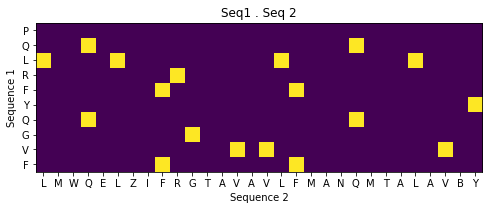

In [5]:
seq12m = np.dot(seq1m,seq2m.transpose())

show_dot_product(seq12m,seq1,seq2,title="Seq1 . Seq 2")

### Using real sequences

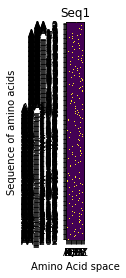

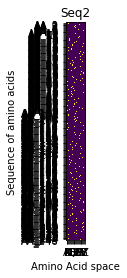

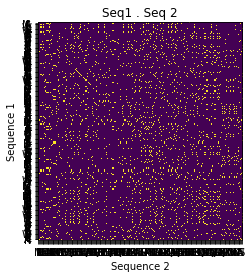

In [6]:
seq1 = "MAFLWLLSCWALLGTTFGCGVPAIHPVLSGLSRIVNGEDAVPGSWPWQVSLQDKTGFHFC"
seq1 += "GGSLISEDWVVTAAHCGVRTSDVVVAGEFDQGSDEENIQVLKIAKVFKNPKFSILTVNND"
seq1 += "ITLLKLATPARFSQTVSAVCLPSADDDFPAGTLCATTGWGKTKYNANKTPDKLQQAALPL"
seq1 += "LSNAECKKSWGRRITDVMICAGASGVSSCMGDSGGPLVCQKDGAWTLVGIVSWGSDTCSTSSPGVYARVTKLIPWVQKILAAN"

seq2 = "MNPLLILTFVAAALAAPFDDDDKIVGGYNCEENSVPYQVSLNSGYHFCGGSLINEQWVVS"
seq2 += "AGHCYKSRIQVRLGEHNIEVLEGNEQFINAAKIIRHPQYDRKTLNNDIMLIKLSSRAVIN"
seq2 += "ARVSTISLPTAPPATGTKCLISGWGNTASSGADYPDELQCLDAPVLSQAKCEASYPGKIT"
seq2 += "SNMFCVGFLEGGKDSCQGDSGGPVVCNGQLQGVVSWGDGCAQKNKPGVYTKVYNYVKWIKNTIAANS"

seq1m = seq_to_matrix(seq1,aas)
seq2m = seq_to_matrix(seq2,aas)    
show_matrix_seq(seq1m,aas,"Seq1")
show_matrix_seq(seq2m,aas,"Seq2")
seq12m = np.dot(seq1m,seq2m.transpose())
show_dot_product(seq12m,seq1,seq2,title="Seq1 . Seq 2")

## Validate that the dot plot functions is correct  
Perform a dot product between a matrix sequence and itself

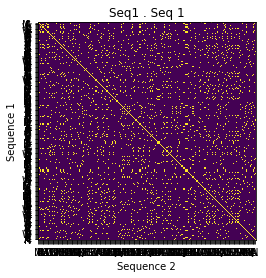

In [7]:
seq11m = np.dot(seq1m,seq1m.transpose())
show_dot_product(seq11m,seq1,seq1,title="Seq1 . Seq 1")